In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames


# Load the Home Credit Default Risk dataset
data_train = pd.read_csv("Udacity_Projects/Home_Credit_Default_Risk/application_train.csv",low_memory=False)
data_bureau = pd.read_csv("Udacity_Projects/Home_Credit_Default_Risk/bureau.csv",low_memory=False)
data_bureau_balance = pd.read_csv("Udacity_Projects/Home_Credit_Default_Risk/bureau_balance.csv",low_memory=False)
data_credit_card_balance = pd.read_csv("Udacity_Projects/Home_Credit_Default_Risk/credit_card_balance.csv",low_memory=False)
data_installments_payments= pd.read_csv("Udacity_Projects/Home_Credit_Default_Risk/installments_payments.csv",low_memory=False)
data_POS_CASH_balance= pd.read_csv("Udacity_Projects/Home_Credit_Default_Risk/POS_CASH_balance.csv",low_memory=False)
data_previous_application= pd.read_csv("Udacity_Projects/Home_Credit_Default_Risk/previous_application.csv",low_memory=False)
data_test = pd.read_csv("Udacity_Projects/Home_Credit_Default_Risk/application_test.csv",low_memory=False)


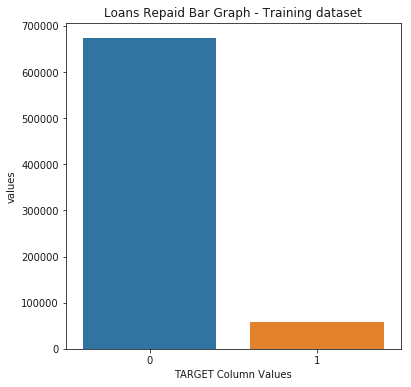

In [38]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
TARGET_Column = data_train["TARGET"].value_counts()
df = pd.DataFrame({'TARGET Column Values': TARGET_Column.index,
                   'values': TARGET_Column.values
                  })
plt.figure(figsize = (6,6))
plt.title('Loans Repaid Bar Graph - Training dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'TARGET Column Values', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

In [40]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(data_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()  

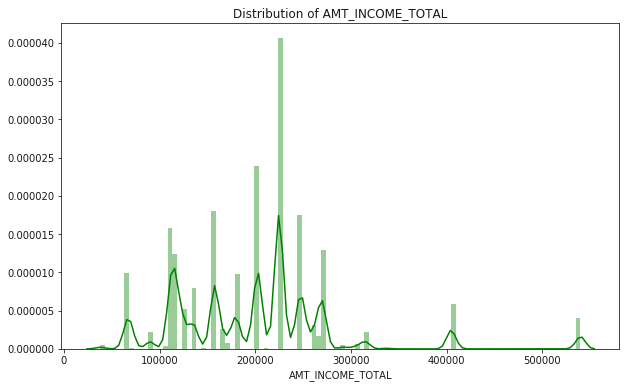

In [42]:
plot_distribution('AMT_INCOME_TOTAL','green')

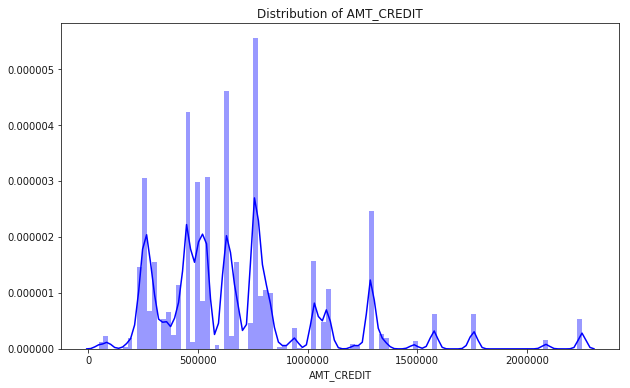

In [43]:
plot_distribution('AMT_CREDIT','blue')

KeyError: 'AMT_ANNUITY'

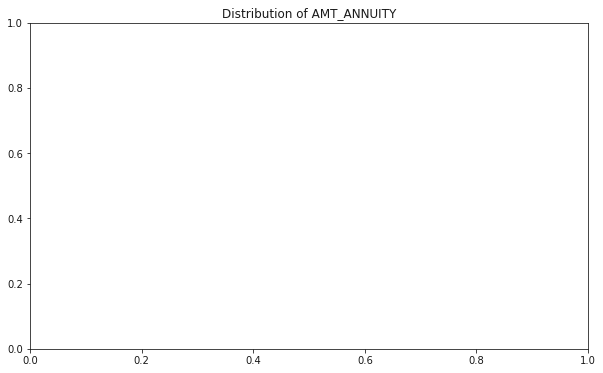

In [44]:
plot_distribution('AMT_ANNUITY','tomato')

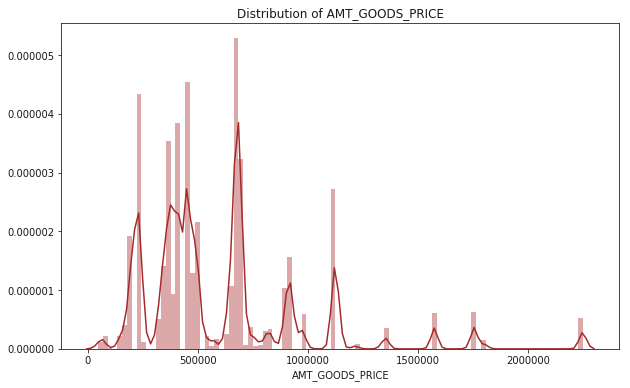

In [45]:
plot_distribution('AMT_GOODS_PRICE','brown')

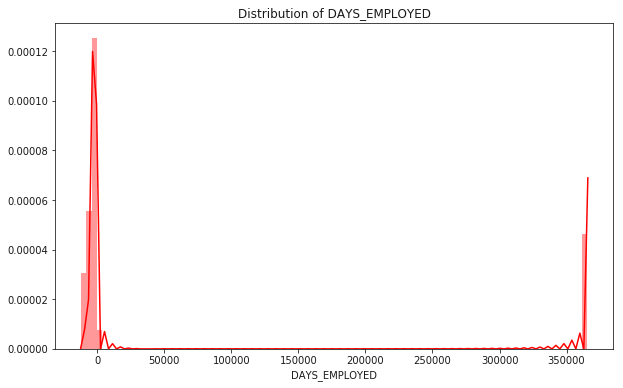

In [46]:
plot_distribution('DAYS_EMPLOYED','red')

In [2]:
print('Below is statistics of primary key data in data_bureau which is available as foreign key in data_bureau_balance')
display(data_bureau['SK_ID_BUREAU'].isin(data_bureau_balance['SK_ID_BUREAU']).value_counts())

print('Below is statistics of primary key data in data_train which is available as foreign key in data_bureau')
display(data_train['SK_ID_CURR'].isin(data_bureau['SK_ID_CURR']).value_counts())

print('Below is statistics of primary key data in data_train which is available as foreign key in data_credit_card_balance')
display(data_train['SK_ID_CURR'].isin(data_credit_card_balance['SK_ID_CURR']).value_counts())

print('Below is statistics of primary key data in data_train which is available as foreign key in data_installments_payments')
display(data_train['SK_ID_CURR'].isin(data_installments_payments['SK_ID_CURR']).value_counts())

print('Below is statistics of primary key data in data_train which is available as foreign key in data_POS_CASH_balance')
display(data_train['SK_ID_CURR'].isin(data_POS_CASH_balance['SK_ID_CURR']).value_counts())

print('Below is statistics of primary key data in data_train which is available as foreign key in data_previous_application')
display(data_train['SK_ID_CURR'].isin(data_previous_application['SK_ID_CURR']).value_counts())


Below is statistics of primary key data in data_bureau which is available as foreign key in data_bureau_balance


False    942074
True     774354
Name: SK_ID_BUREAU, dtype: int64

Below is statistics of primary key data in data_train which is available as foreign key in data_bureau


True     263491
False     44020
Name: SK_ID_CURR, dtype: int64

Below is statistics of primary key data in data_train which is available as foreign key in data_credit_card_balance


False    220606
True      86905
Name: SK_ID_CURR, dtype: int64

Below is statistics of primary key data in data_train which is available as foreign key in data_installments_payments


True     291643
False     15868
Name: SK_ID_CURR, dtype: int64

Below is statistics of primary key data in data_train which is available as foreign key in data_POS_CASH_balance


True     289444
False     18067
Name: SK_ID_CURR, dtype: int64

Below is statistics of primary key data in data_train which is available as foreign key in data_previous_application


True     291057
False     16454
Name: SK_ID_CURR, dtype: int64

In [3]:
print('Below is statistics of primary key data in data_test which is available as foreign key in data_bureau')
display(data_test['SK_ID_CURR'].isin(data_bureau['SK_ID_CURR']).value_counts())

print('Below is statistics of primary key data in data_test which is available as foreign key in data_credit_card_balance')
display(data_test['SK_ID_CURR'].isin(data_credit_card_balance['SK_ID_CURR']).value_counts())

print('Below is statistics of primary key data in data_test which is available as foreign key in data_installments_payments')
display(data_test['SK_ID_CURR'].isin(data_installments_payments['SK_ID_CURR']).value_counts())

print('Below is statistics of primary key data in data_test which is available as foreign key in data_POS_CASH_balance')
display(data_test['SK_ID_CURR'].isin(data_POS_CASH_balance['SK_ID_CURR']).value_counts())

print('Below is statistics of primary key data in data_test which is available as foreign key in data_previous_application')
display(data_test['SK_ID_CURR'].isin(data_previous_application['SK_ID_CURR']).value_counts())

Below is statistics of primary key data in data_test which is available as foreign key in data_bureau


True     42320
False     6424
Name: SK_ID_CURR, dtype: int64

Below is statistics of primary key data in data_test which is available as foreign key in data_credit_card_balance


False    32091
True     16653
Name: SK_ID_CURR, dtype: int64

Below is statistics of primary key data in data_test which is available as foreign key in data_installments_payments


True     47944
False      800
Name: SK_ID_CURR, dtype: int64

Below is statistics of primary key data in data_test which is available as foreign key in data_POS_CASH_balance


True     47808
False      936
Name: SK_ID_CURR, dtype: int64

Below is statistics of primary key data in data_test which is available as foreign key in data_previous_application


True     47800
False      944
Name: SK_ID_CURR, dtype: int64

In [4]:

print('Below is Shape of data_bureau before filtering')
display(data_bureau.shape)

#filter data bureau with only data where SK_ID_BUREAU is present in data_bureau_balance
data_bureau=data_bureau.loc[(data_bureau['SK_ID_BUREAU'].isin(data_bureau_balance['SK_ID_BUREAU']))]

print('Below is Shape of data_bureau after filtering to retain only that data where SK_ID_BUREAU is present in data_bureau_balance')
display(data_bureau.shape)


print('Below is Shape of data_train before filtering')
display(data_train.shape)

# To reduce memory requirements populate data in application_train.csv only with those 
# primary key SK_ID_CURR which are available as foreign key in all other tables

data_train=data_train.loc[(data_train['SK_ID_CURR'].isin(data_bureau['SK_ID_CURR'])) 
                          & (data_train['SK_ID_CURR'].isin(data_credit_card_balance['SK_ID_CURR']))
                          & (data_train['SK_ID_CURR'].isin(data_installments_payments['SK_ID_CURR']))
                          & (data_train['SK_ID_CURR'].isin(data_POS_CASH_balance['SK_ID_CURR']))
                          & (data_train['SK_ID_CURR'].isin(data_previous_application['SK_ID_CURR']))
                         ] 


# Take only top 5k rows to resolve memory issues
data_train=data_train.head(100)

print('Below is final Shape of data_train after filtering to retain only that data where pk SK_ID_CURR is available as foreign key in all other tables and this will be used as final training dataset')
display(data_train.shape)




Below is Shape of data_bureau before filtering


(1716428, 17)

Below is Shape of data_bureau after filtering to retain only that data where SK_ID_BUREAU is present in data_bureau_balance


(774354, 17)

Below is Shape of data_train before filtering


(307511, 122)

Below is final Shape of data_train after filtering to retain only that data where pk SK_ID_CURR is available as foreign key in all other tables and this will be used as final training dataset


(100, 122)

In [5]:
print('Below is Shape of data_test before filtering')
display(data_test.shape)

# To reduce memory requirements populate data in application_train.csv only with those 
# primary key SK_ID_CURR which are available as foreign key in all other tables

data_test=data_test.loc[(data_test['SK_ID_CURR'].isin(data_bureau['SK_ID_CURR'])) 
                          & (data_test['SK_ID_CURR'].isin(data_credit_card_balance['SK_ID_CURR']))
                          & (data_test['SK_ID_CURR'].isin(data_installments_payments['SK_ID_CURR']))
                          & (data_test['SK_ID_CURR'].isin(data_POS_CASH_balance['SK_ID_CURR']))
                          & (data_test['SK_ID_CURR'].isin(data_previous_application['SK_ID_CURR']))
                         ] 

data_test=data_test.head(500)
data_test=data_test.fillna(0)

print('Below is final Shape of data_test after filtering to retain only that data where pk SK_ID_CURR is available as foreign key in all other tables and this will be used as final test dataset')

display(data_test.shape)

Below is Shape of data_test before filtering


(48744, 121)

Below is final Shape of data_test after filtering to retain only that data where pk SK_ID_CURR is available as foreign key in all other tables and this will be used as final test dataset


(500, 121)

In [6]:
print('Below is Shape of data_bureau before filtering')
display(data_bureau.shape)


data_bureau=data_bureau.loc[(data_bureau['SK_ID_CURR'].isin(data_train['SK_ID_CURR'])) | 
                                    (data_bureau['SK_ID_CURR'].isin(data_test['SK_ID_CURR']))]


data_bureau=data_bureau.merge(data_bureau_balance,
                 on='SK_ID_BUREAU',
                 how='inner')

print('Below is Shape of data_bureau after merging with data_bureau_balance on key SK_ID_BUREAU')

display(data_bureau.shape)

print('Below is Shape of data_credit_card_balance before filtering')
display(data_credit_card_balance.shape)

data_credit_card_balance=data_credit_card_balance.loc[(data_credit_card_balance['SK_ID_CURR'].isin(data_train['SK_ID_CURR'])) | 
                                    (data_credit_card_balance['SK_ID_CURR'].isin(data_test['SK_ID_CURR']))]

print('Below is Shape of data_credit_card_balance after filtering. Only those records are left whose primary key data is available in data_train or data_test')
display(data_credit_card_balance.shape)


print('Below is Shape of data_installments_payments before filtering')
display(data_installments_payments.shape)

data_installments_payments=data_installments_payments.loc[(data_installments_payments['SK_ID_CURR'].isin(data_train['SK_ID_CURR'])) | 
                                    (data_installments_payments['SK_ID_CURR'].isin(data_test['SK_ID_CURR']))]

print('Below is Shape of data_installments_payments after filtering. Only those records are left whose primary key data is available in data_train or data_test')
display(data_installments_payments.shape)
                          

print('Below is Shape of data_POS_CASH_balance before filtering')
display(data_POS_CASH_balance.shape)

data_POS_CASH_balance=data_POS_CASH_balance.loc[(data_POS_CASH_balance['SK_ID_CURR'].isin(data_train['SK_ID_CURR'])) | 
                                    (data_POS_CASH_balance['SK_ID_CURR'].isin(data_test['SK_ID_CURR']))]

print('Below is Shape of data_POS_CASH_balance after filtering. Only those records are left whose primary key data is available in data_train or data_test')

display(data_POS_CASH_balance.shape)


print('Below is Shape of data_previous_application before filtering')
display(data_previous_application.shape)

data_previous_application=data_previous_application.loc[(data_previous_application['SK_ID_CURR'].isin(data_train['SK_ID_CURR'])) | 
                                    (data_previous_application['SK_ID_CURR'].isin(data_test['SK_ID_CURR']))]

print('Below is Shape of data_previous_application after filtering. Only those records are left whose primary key data is available in data_train or data_test')

display(data_previous_application.shape)




Below is Shape of data_bureau before filtering


(774354, 17)

Below is Shape of data_bureau after merging with data_bureau_balance on key SK_ID_BUREAU


(136830, 19)

Below is Shape of data_credit_card_balance before filtering


(3840312, 23)

Below is Shape of data_credit_card_balance after filtering. Only those records are left whose primary key data is available in data_train or data_test


(21757, 23)

Below is Shape of data_installments_payments before filtering


(13605401, 8)

Below is Shape of data_installments_payments after filtering. Only those records are left whose primary key data is available in data_train or data_test


(43516, 8)

Below is Shape of data_POS_CASH_balance before filtering


(10001358, 8)

Below is Shape of data_POS_CASH_balance after filtering. Only those records are left whose primary key data is available in data_train or data_test


(22702, 8)

Below is Shape of data_previous_application before filtering


(1670214, 37)

Below is Shape of data_previous_application after filtering. Only those records are left whose primary key data is available in data_train or data_test


(4348, 37)

In [7]:
# Merge data_train with data_bureau on key SK_ID_CURR. 
# data_bureau was already merged with data_bureau_balance above on key SK_ID_BUREAU

data_train=data_train.merge(data_bureau,
                 on='SK_ID_CURR',
                 how='inner')

In [8]:
# Merge data_train again with data_credit_card_balance on key SK_ID_CURR. 

data_train=data_train.merge(data_credit_card_balance,
                 on='SK_ID_CURR',
                 how='inner')

In [9]:
# Merge data_train again with data_installments_payments on key SK_ID_CURR. 
# This code is commented because of out of memory issues

#data_train=data_train.merge(data_installments_payments,
#                 on='SK_ID_CURR',
#                 how='inner')

In [10]:
# Merge data_train again with data_POS_CASH_balance on key SK_ID_CURR. 
# This code is commented because of out of memory issues

#data_train=data_train.merge(data_POS_CASH_balance,
#                 on='SK_ID_CURR',
#                 how='inner')

In [11]:
# Merge data_train again with data_previous_application on key SK_ID_CURR. 
# This code is commented because of out of memory issues

#data_train=data_train.merge(data_previous_application,
#                 on='SK_ID_CURR',
#                 how='inner')

In [12]:

print('Below is Shape of data_train after merging with other datasets on primary key SK_ID_CURR')
display(data_train.shape)

# Remove duplicate primary key data and take only top 1 row
#data_train = data_train.reset_index().drop_duplicates(subset='SK_ID_CURR', keep='first')

#print('Below is Shape of data_train after merging with other datasets on primary key SK_ID_CURR and removal of duplicates')
#display(data_train.shape)


Below is Shape of data_train after merging with other datasets on primary key SK_ID_CURR


(731793, 162)

In [13]:
# Merge data_test with data_bureau on key SK_ID_CURR. 
# data_bureau was already merged with data_bureau_balance above on key SK_ID_BUREAU

data_test=data_test.merge(data_bureau,
                 on='SK_ID_CURR',
                 how='inner')

In [14]:
# Merge data_test with data_credit_card_balance on key SK_ID_CURR. 

data_test=data_test.merge(data_credit_card_balance,
                 on='SK_ID_CURR',
                 how='inner')

In [15]:
# Merge data_test again with data_installments_payments on key SK_ID_CURR. 
# This code is commented because of out of memory issues

#data_test=data_test.merge(data_installments_payments,
#                 on='SK_ID_CURR',
#                 how='inner')

In [16]:
# Merge data_test again with data_POS_CASH_balance on key SK_ID_CURR. 
# This code is commented because of out of memory issues

#data_test=data_test.merge(data_POS_CASH_balance,
#                 on='SK_ID_CURR',
#                 how='inner')

In [17]:
# Merge data_test again with data_previous_application on key SK_ID_CURR. 
# This code is commented because of out of memory issues

#data_train=data_test.merge(data_previous_application,
#                 on='SK_ID_CURR',
#                 how='inner')data_testdata_test

In [18]:

print('Below is Shape of data_test after merging with other datasets on primary key SK_ID_CURR')
display(data_test.shape)

# Remove duplicate primary key data and take only top 1 row
data_test = data_test.reset_index().drop_duplicates(subset='SK_ID_CURR', keep='first')

print('Below is Shape of data_test after merging with other datasets on primary key SK_ID_CURR and removal of duplicates')
display(data_test.shape)

Below is Shape of data_test after merging with other datasets on primary key SK_ID_CURR


(4884076, 161)

Below is Shape of data_test after merging with other datasets on primary key SK_ID_CURR and removal of duplicates


(500, 162)

In [19]:
# Fill na values with 0 in both data_train and data_test dataframes as a data preprossing step

data_train=data_train.fillna(0)
data_test=data_test.fillna(0)

In [20]:
# Take training labels from training dataset

application_labels_train = data_train['TARGET']

# Remove target labels from training dataset
features_without_labels = data_train.drop('TARGET', axis = 1)

features_without_labels.head(1)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,100043,Cash loans,F,N,Y,2,198000.0,641173.5,23157.0,553500.0,...,0.0,0.0,0.0,0,0.0,0.0,20.0,Active,0,0


In [21]:
# One-hot encoding of data using pandas.get_dummies()

features_final = pd.get_dummies(pd.concat([features_without_labels,data_test],keys=[0,1]))

encoded = list(features_final.columns)

# Print the number of features after one-hot encoding
print('total features after one-hot encoding. %d' % len(encoded))


features_final_train=features_final.xs(0)
features_final_test=features_final.xs(1)

#Remove NA values
features_final_train=features_final_train.fillna(0)
features_final_test=features_final_test.fillna(0)


total features after one-hot encoding. 283


In [22]:
# Import train_test_split
from sklearn.model_selection  import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final_train, 
                                                    application_labels_train, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has %d samples." % X_train.shape[0])
print("Testing set has %d samples." % X_test.shape[0])
#X_train

Training set has 585434 samples.
Testing set has 146359 samples.


In [23]:
# TODO: Calculate Naive Model accuracy, precision and recall
accuracy = np.sum(application_labels_train) / len(application_labels_train)

recall = 1
precision = np.sum(application_labels_train) / (np.sum(application_labels_train) + (len(application_labels_train)-np.sum(application_labels_train)))

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = ((1 + np.square(.5))*precision*recall) /  ((np.square(.5)*precision)+recall)


In [36]:
# Print the results 
print("Accuracy for training predictions of Naive Model is %s" %(format(accuracy, '.4f')))
print("Fbeta-score for testing predictions of Naive Model is %s" %(format(fscore, '.4f')))

Accuracy for training predictions of Naive Model is 0.0800
Fbeta-score for testing predictions of Naive Model is 0.0980


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,fbeta_score
from time import time
import sklearn.decomposition as skdc ##Includes Principal Component Analysis, a method of dimensionality reduction
import sklearn.pipeline as skpl
from sklearn.model_selection import GridSearchCV

pca = skdc.PCA() #empty model space

logreg = LogisticRegression()#empty model space
pca_logistic_regressor_pipe = skpl.Pipeline([('pca', pca), ('logistic', logreg)]) 





In [26]:
# Fit the model withourt
pca_logistic_regressor_pipe.fit(X_train,y_train)


Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [28]:
start = time() # Get start time
predictions_test = pca_logistic_regressor_pipe.predict(X_test) #None
predictions_train = pca_logistic_regressor_pipe.predict(X_train)
end = time() # Get end time


results = {}
# TODO: Calculate the total prediction time
results['pred_time'] = end - start

# TODO: Compute accuracy on training data
results['acc_train'] = accuracy_score(y_train,predictions_train)

# TODO: Compute accuracy on test data
results['acc_test'] = accuracy_score(y_test,predictions_test)

# TODO: Compute F-score on training data
results['f_train'] = fbeta_score(y_train,predictions_train,beta=0.5)

# TODO: Compute F-score on test data
results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)

In [29]:
print("Total Prediction time is %s" %(format(results['pred_time'], '.4f')))
print("Accuracy for training predictions is %s" %(format(results['acc_train'], '.4f')))
print("Accuracy for testing predictions is %s" %(format(results['acc_test'], '.4f')))
print("Fbeta-Score for training predictions is %s" %(format(results['f_train'], '.4f')))
print("Fbeta-Score for testing predictions is %s" %(format(results['f_test'], '.4f')))

Total Prediction time is 9.8165
Accuracy for training predictions is 0.6728
Accuracy for testing predictions is 0.6716
Fbeta-Score for training predictions is 0.2183
Fbeta-Score for testing predictions is 0.2193


In [30]:


n_components = [10, 20, 30]
Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
grid_obj = GridSearchCV(pca_logistic_regressor_pipe,
                         dict(pca__n_components=n_components,logistic__C=Cs))

grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_





In [31]:
start = time() # Get start time
predictions_test = best_clf.predict(X_test) #None
predictions_train = best_clf.predict(X_train)
end = time() # Get end time


#results = {}
# TODO: Calculate the total prediction time
results['pred_time'] = end - start

# TODO: Compute accuracy on training data
results['acc_train'] = accuracy_score(y_train,predictions_train)

# TODO: Compute accuracy on test data
results['acc_test'] = accuracy_score(y_test,predictions_test)

# TODO: Compute F-score on training data
results['f_train'] = fbeta_score(y_train,predictions_train,beta=0.5)

# TODO: Compute F-score on test data
results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)


In [32]:
print("Total Prediction time is %s" %(format(results['pred_time'], '.4f')))

print("Accuracy for training predictions is %s" %(format(results['acc_train'], '.4f')))
print("Accuracy for testing predictions is %s" %(format(results['acc_test'], '.4f')))
print("Fbeta-Score for training predictions is %s" %(format(results['f_train'], '.4f')))
print("Fbeta-Score for testing predictions is %s" %(format(results['f_test'], '.4f')))

Total Prediction time is 4.3740
Accuracy for training predictions is 0.9772
Accuracy for testing predictions is 0.9770
Fbeta-Score for training predictions is 0.8833
Fbeta-Score for testing predictions is 0.8847


In [33]:
# Predict outcomes for actual test file provided application_train.csv. 
#Because of memory and processing constraints, we have only computed predictions for 500 records

predictions_test_actual = best_clf.predict(features_final_test)

df = pd.DataFrame(data_test['SK_ID_CURR'], columns=["SK_ID_CURR"])
df['TARGET'] = predictions_test_actual
df.to_csv("Home_Credit_Default_Risk_Predictions.csv", index=False)

In [39]:
best_clf

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])